In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import itertools
from nltk.stem import  WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [439]:
df_train= pd.read_csv('./data/twitter-sentiment-analysis2/train.csv',encoding='latin1')

In [440]:
df_train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [441]:
df_train[df_train['Sentiment']==1]

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
...,...,...,...
99980,99992,1,@cunningstunts22 afternoon jim hows you x
99982,99994,1,@Cup_Of_Katy Have fun doing health &amp; safet...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [442]:
df_train['length'] = df_train['SentimentText'].apply(len)
df_train.groupby(['Sentiment'])['length'].mean()

Sentiment
0    78.445259
1    76.353721
Name: length, dtype: float64

In [443]:
df_train.head()

,ItemID,Sentiment,SentimentText,length
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


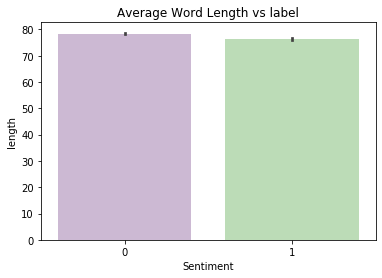

In [444]:
fig1 = sns.barplot('Sentiment','length',data = df_train,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

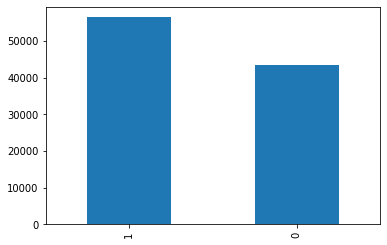

In [445]:
df_train['Sentiment'].value_counts().plot(kind='bar')

In [446]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [447]:
table = str.maketrans('', '', string.punctuation)

In [448]:
'dsdsc###'.translate(table)

'dsdsc'

In [449]:
def remove_punc(text):
    wordlist = text.split()
    stripped = [w.translate(table) for w in wordlist]
    return stripped

In [450]:
remove_punc('sdcdsc.dcd... ddffv....')

['sdcdscdcd', 'ddffv']

In [451]:
df_train['SentimentText_wordlist'] =df_train['SentimentText'].apply(remove_punc)
df_train['SentimentText_wordlist'].head()

0                  [is, so, sad, for, my, APL, friend]
1                 [I, missed, the, New, Moon, trailer]
2                          [omg, its, already, 730, O]
3    [, Omgaga, Im, sooo, im, gunna, CRy, Ive, been...
4         [i, think, mi, bf, is, cheating, on, me, TT]
Name: SentimentText_wordlist, dtype: object

In [452]:
def lower_text_isalpha(text):
    tokens = [w.lower() for w in text]
    words = [w for w in tokens if w.isalpha()]
    return words

In [453]:
df_train['SentimentText_wordlist'] =df_train['SentimentText_wordlist'].apply(lower_text_isalpha)
df_train['SentimentText_wordlist'].head()

0                  [is, so, sad, for, my, apl, friend]
1                 [i, missed, the, new, moon, trailer]
2                               [omg, its, already, o]
3    [omgaga, im, sooo, im, gunna, cry, ive, been, ...
4         [i, think, mi, bf, is, cheating, on, me, tt]
Name: SentimentText_wordlist, dtype: object

In [454]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [455]:
def remove_stopword(text):
    words = [w for w in text if not w in stop_words]
    return words

In [456]:
df_train['SentimentText_wordlist'] =df_train['SentimentText_wordlist'].apply(remove_stopword)

In [457]:
df_train['SentimentText_wordlist'].head()

0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                       [omg, already]
3    [omgaga, im, sooo, im, gunna, cry, ive, dentis...
4                        [think, mi, bf, cheating, tt]
Name: SentimentText_wordlist, dtype: object

In [458]:
s = 'friend.............'
''.join(i for i, _ in itertools.groupby(s))

'friend.'

In [459]:
df_train['SentimentText_wordlist'].head()

0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                       [omg, already]
3    [omgaga, im, sooo, im, gunna, cry, ive, dentis...
4                        [think, mi, bf, cheating, tt]
Name: SentimentText_wordlist, dtype: object

In [460]:
wordnet_lemmatizer = WordNetLemmatizer()

In [461]:
def lemmetize(text):
    words = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stop_words]
    return words

In [462]:
lemmetize(["dances",'studies','cryying'])

['dance', 'study', 'cryying']

In [463]:
df_train['SentimentText_wordlist'] =df_train['SentimentText_wordlist'].apply(lemmetize)

In [464]:
df_train['SentimentText_wordlist'].head()

0                                   [sad, apl, friend]
1                         [missed, new, moon, trailer]
2                                       [omg, already]
3    [omgaga, im, sooo, im, gunna, cry, ive, dentis...
4                        [think, mi, bf, cheating, tt]
Name: SentimentText_wordlist, dtype: object

In [465]:
df_train['SentimentText_wordlist'] =df_train['SentimentText_wordlist'].apply(lambda x : ' '.join(x))

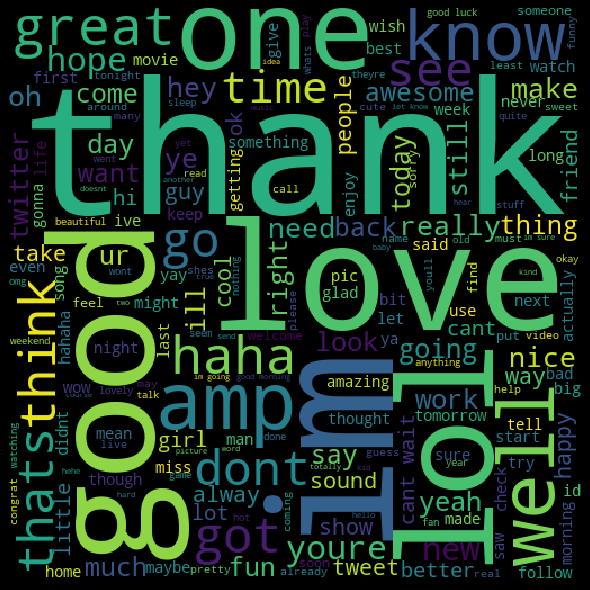

In [466]:
from wordcloud import WordCloud
spam_words= ''.join(list(df_train[df_train['Sentiment']==1]['SentimentText_wordlist']))
plt.figure(figsize=(10,8), facecolor='k')
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

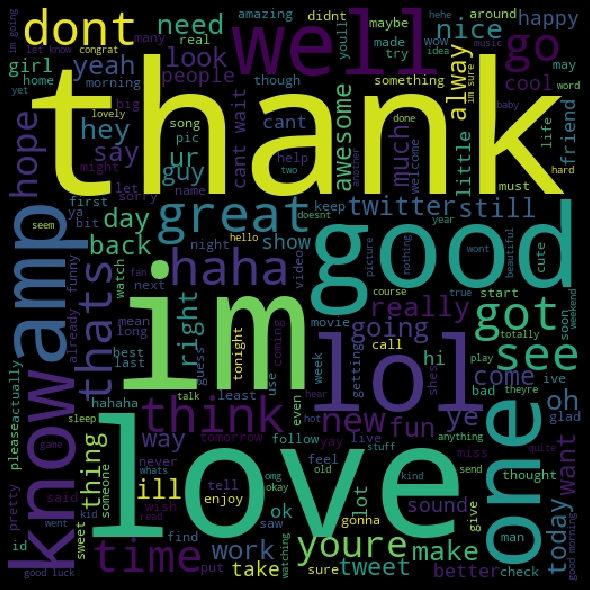

In [467]:
from wordcloud import WordCloud
spam_words= ''.join(list(df_train[df_train['Sentiment']==1]['SentimentText_wordlist']))
plt.figure(figsize=(10,8), facecolor='k')
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [468]:
df_train['SentimentText_wordlist'].head()

0                                       sad apl friend
1                              missed new moon trailer
2                                          omg already
3    omgaga im sooo im gunna cry ive dentist since ...
4                              think mi bf cheating tt
Name: SentimentText_wordlist, dtype: object

In [469]:
X = df_train['SentimentText_wordlist']
y = df_train['Sentiment']
X.shape

(99989,)

In [470]:
msg_train, msg_test, label_train, label_test = train_test_split(X, \
                                                                y, test_size=0.2)

In [471]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(1,2))),  
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [472]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.53      0.81      0.64      5692
           1       0.91      0.71      0.80     14306

    accuracy                           0.74     19998
   macro avg       0.72      0.76      0.72     19998
weighted avg       0.80      0.74      0.75     19998



[[ 4622  1070]
 [ 4093 10213]]
0.7418241824182418


In [473]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [474]:
msg_train

12423                     quotand may feel little sickquot
86815          like laughhave good timefollow meits simple
19780                                           good thank
28661                                 aboyy havent got yet
84484                                astynes oh sound cute
                               ...                        
71142    brewtones nice poster annd yall say quotlimite...
55838              babynotincluded requested thanks asking
76145                                      course u miss u
41551         anaquita stuff vitamens glueten free brownie
22541    quilateara yes mr bear snuggle blanket ill mis...
Name: SentimentText_wordlist, Length: 79991, dtype: object

In [475]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf.fit(msg_train)
msg_train = tfidf.transform(msg_train)
msg_test = tfidf.transform(msg_test)

In [476]:
# one hot encode outputs
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

count_classes = label_test.shape
print(count_classes)
msg_train.shape

(19998, 2)


(79991, 461452)

In [479]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=461452))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [480]:
# build the model
model.fit(msg_train,label_train, epochs=2)

Epoch 1/2
79991/79991 [==============================] - 690s 9ms/step - loss: 0.5184 - accuracy: 0.7399
Epoch 2/2
79991/79991 [==============================] - 796s 10ms/step - loss: 0.1047 - accuracy: 0.9639
